In [ ]:

!pip install pandas scikit-learn matplotlib tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert the training data and test data into Pandas DataFrames for easy manipulation
train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))  # Flatten images into vectors
test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))  # Flatten test images

# Add labels as a new column
train_df['label'] = y_train
test_df['label'] = y_test

# Show the first few rows of the training dataset
train_df.head()

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model input (28x28 images reshaped to 28x28x1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels (convert to categorical)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Visualize the first few images in the training dataset
for i in range(5):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.show()

In [ ]:
# Create the CNN model
model = Sequential([
    # First convolutional layer with max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the image to a 1D vector
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 classes (digits 0-9)
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

In [ ]:
# Predict on the test set
predictions = model.predict(X_test)

# Display the first image in the test set and its predicted label
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()

In [4]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib with the alias 'plt'

# Plot the training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8857 - loss: 0.3603 - val_accuracy: 0.9812 - val_loss: 0.0601
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9826 - loss: 0.0558 - val_accuracy: 0.9855 - val_loss: 0.0537
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9880 - val_loss: 0.0433
313/313 - 4s - 13ms/step - accuracy: 0.9876 - loss: 0.0393
Test accuracy: 0.9876000285148621
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


NameError: name 'np' is not defined

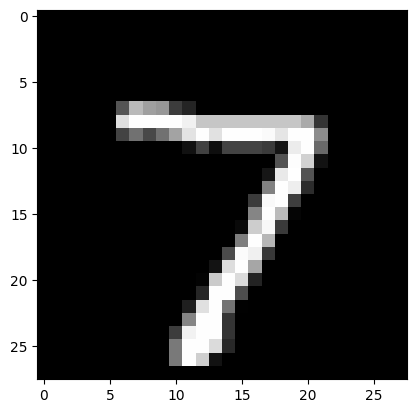

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create and compile the CNN model
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2) # This line is crucial: it assigns the training history to the 'history' variable

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(X_test)

# Display an image and its prediction
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()

# Plot the training and validation accuracy
# Now 'history' is accessible here because it was defined in the same cell or scope
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()